<a href="https://colab.research.google.com/github/SaahilShaikh17/LoanDefaultPrediction/blob/main/LoanDefaultPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LOAN DEFAULT PREDICTION-R PROGRAMMING


##Importing Libraries

In [62]:
 #install.packages("readr")
 #install.packages("caret")
 #install.packages("rpart.plot")
 #install.packages("class")
 #install.packages("ROSE")
 #install.packages("smotefamily")
 #install.packages("pROC")
 #install.packages("randomForest")

library(e1071)
library(pROC)
library(readr)
library(caret)
library(rpart)        # For decision trees
library(rpart.plot)
library(class)
library(ROSE)
library(smotefamily)
library(ggplot2)
library(randomForest)

In [22]:
install.packages("reshape2")
library(reshape2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



##Loading Data

In [23]:

df <- read.csv("https://raw.githubusercontent.com/SaahilShaikh17/LoanDefaultPrediction/main/Loan_default.csv")

In [24]:
head(df)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
2,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
3,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
4,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
5,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
6,A9S62RQ7US,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1


The above shows us the top 6 values of each feature in our dataframe df.further We will analyse which features are categorcal and which are numerical in nature


## Data Exploration


In [25]:
str(df)

'data.frame':	255347 obs. of  18 variables:
 $ LoanID        : chr  "I38PQUQS96" "HPSK72WA7R" "C1OZ6DPJ8Y" "V2KKSFM3UN" ...
 $ Age           : int  56 69 46 32 60 25 38 56 36 40 ...
 $ Income        : int  85994 50432 84208 31713 20437 90298 111188 126802 42053 132784 ...
 $ LoanAmount    : int  50587 124440 129188 44799 9139 90448 177025 155511 92357 228510 ...
 $ CreditScore   : int  520 458 451 743 633 720 429 531 827 480 ...
 $ MonthsEmployed: int  80 15 26 0 8 18 80 67 83 114 ...
 $ NumCreditLines: int  4 1 3 3 4 2 1 4 1 4 ...
 $ InterestRate  : num  15.23 4.81 21.17 7.07 6.51 ...
 $ LoanTerm      : int  36 60 24 24 48 24 12 60 48 48 ...
 $ DTIRatio      : num  0.44 0.68 0.31 0.23 0.73 0.1 0.16 0.43 0.2 0.33 ...
 $ Education     : chr  "Bachelor's" "Master's" "Master's" "High School" ...
 $ EmploymentType: chr  "Full-time" "Full-time" "Unemployed" "Full-time" ...
 $ MaritalStatus : chr  "Divorced" "Married" "Divorced" "Married" ...
 $ HasMortgage   : chr  "Yes" "No" "Yes" "No" ...

In [26]:
df<- subset(df, select=-LoanID)

As seen above it shows us which are char datatypes and which are integer datatypes. As loan_id is a non predictor feature we will be dropping that as it would not contribute to our analysis

In [27]:
head(df)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
2,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
3,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
4,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
5,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
6,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1


In [28]:
#Shape of our dataset
dim(df)


[1] 255347     17

In [29]:
#Checking for null values
total_missing_values <- sum(is.na(df))
cat("Total missing values:", total_missing_values)

Total missing values: 0

In [30]:
num_duplicates<- sum(duplicated(df))
cat("Number of duplicated rows: ", num_duplicates)

Number of duplicated rows:  0

The above inspection shows, that our data contains no null values that need to be handled. It was also observed that there exists no duplicated rows in the dataset.
Hence, we can now further check for our categorical data for our label encoding

In [31]:
install.packages("Hmisc")
library(Hmisc)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [32]:
describe(df)

df 

 17  Variables      255347  Observations
--------------------------------------------------------------------------------
Age 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
  255347        0       52        1     43.5    17.31       20       23 
     .25      .50      .75      .90      .95 
      31       43       56       64       67 

lowest : 18 19 20 21 22, highest: 65 66 67 68 69
--------------------------------------------------------------------------------
Income 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
  255347        0   114620        1    82499    44991    21780    28457 
     .25      .50      .75      .90      .95 
   48826    82466   116219   136519   143206 

lowest :  15000  15001  15002  15003  15004, highest: 149994 149995 149996 149997 149999
--------------------------------------------------------------------------------
LoanAmount 
       n  missing distinct     Info     Mean      Gmd      .05      .1

In [33]:
# categorical cols
categorical_cols <- names(df)[sapply(df, is.character)]
categorical_cols <- c(categorical_cols, 'LoanTerm', 'NumCreditLines')
categorical_cols

[1] "Education"      "EmploymentType" "MaritalStatus"  "HasMortgage"   
[5] "HasDependents"  "LoanPurpose"    "HasCoSigner"    "LoanTerm"      
[9] "NumCreditLines"

In [34]:
# checking for unique values in categorical columns
for (col in categorical_cols) {
  value_counts <- table(df[[col]])
  cat("\nColumn:", col, "\n")
  print(value_counts)
}


Column: Education 

 Bachelor's High School    Master's         PhD 
      64366       63903       63541       63537 

Column: EmploymentType 

    Full-time     Part-time Self-employed    Unemployed 
        63656         64161         63706         63824 

Column: MaritalStatus 

Divorced  Married   Single 
   85033    85302    85012 

Column: HasMortgage 

    No    Yes 
127670 127677 

Column: HasDependents 

    No    Yes 
127605 127742 

Column: LoanPurpose 

     Auto  Business Education      Home     Other 
    50844     51298     51005     51286     50914 

Column: HasCoSigner 

    No    Yes 
127646 127701 

Column: LoanTerm 

   12    24    36    48    60 
50957 51009 51061 51166 51154 

Column: NumCreditLines 

    1     2     3     4 
63554 64130 63834 63829 


In [35]:
summary(df)

      Age           Income         LoanAmount      CreditScore   
 Min.   :18.0   Min.   : 15000   Min.   :  5000   Min.   :300.0  
 1st Qu.:31.0   1st Qu.: 48826   1st Qu.: 66156   1st Qu.:437.0  
 Median :43.0   Median : 82466   Median :127556   Median :574.0  
 Mean   :43.5   Mean   : 82499   Mean   :127579   Mean   :574.3  
 3rd Qu.:56.0   3rd Qu.:116219   3rd Qu.:188985   3rd Qu.:712.0  
 Max.   :69.0   Max.   :149999   Max.   :249999   Max.   :849.0  
 MonthsEmployed   NumCreditLines   InterestRate      LoanTerm    
 Min.   :  0.00   Min.   :1.000   Min.   : 2.00   Min.   :12.00  
 1st Qu.: 30.00   1st Qu.:2.000   1st Qu.: 7.77   1st Qu.:24.00  
 Median : 60.00   Median :2.000   Median :13.46   Median :36.00  
 Mean   : 59.54   Mean   :2.501   Mean   :13.49   Mean   :36.03  
 3rd Qu.: 90.00   3rd Qu.:3.000   3rd Qu.:19.25   3rd Qu.:48.00  
 Max.   :119.00   Max.   :4.000   Max.   :25.00   Max.   :60.00  
    DTIRatio       Education         EmploymentType     MaritalStatus     
 

##EDA

In [36]:
#Boxplots

In [37]:
# Identify numeric columns in the dataframe
numeric_columns <- sapply(df, is.numeric)

# Calculate the correlation matrix for numeric columns only
correlation_matrix <- cor(df[, numeric_columns])

# Print the correlation matrix
print(correlation_matrix)


                         Age        Income    LoanAmount   CreditScore
Age             1.0000000000 -0.0012440952 -0.0022127413 -5.481709e-04
Income         -0.0012440952  1.0000000000 -0.0008653257 -1.430447e-03
LoanAmount     -0.0022127413 -0.0008653257  1.0000000000  1.261270e-03
CreditScore    -0.0005481709 -0.0014304474  0.0012612696  1.000000e+00
MonthsEmployed -0.0003413880  0.0026748770  0.0028168363  6.128273e-04
NumCreditLines -0.0008897680 -0.0020164097  0.0007944049  1.604201e-05
InterestRate   -0.0011273828 -0.0023034253 -0.0022911190  4.361387e-04
LoanTerm        0.0002633451 -0.0009981963  0.0025379660  1.130365e-03
DTIRatio       -0.0046891917  0.0002054967  0.0011224209 -1.039252e-03
Default        -0.1677831649 -0.0991194845  0.0866591772 -3.416649e-02
               MonthsEmployed NumCreditLines  InterestRate      LoanTerm
Age             -3.413880e-04  -8.897680e-04 -1.127383e-03  0.0002633451
Income           2.674877e-03  -2.016410e-03 -2.303425e-03 -0.0009981963


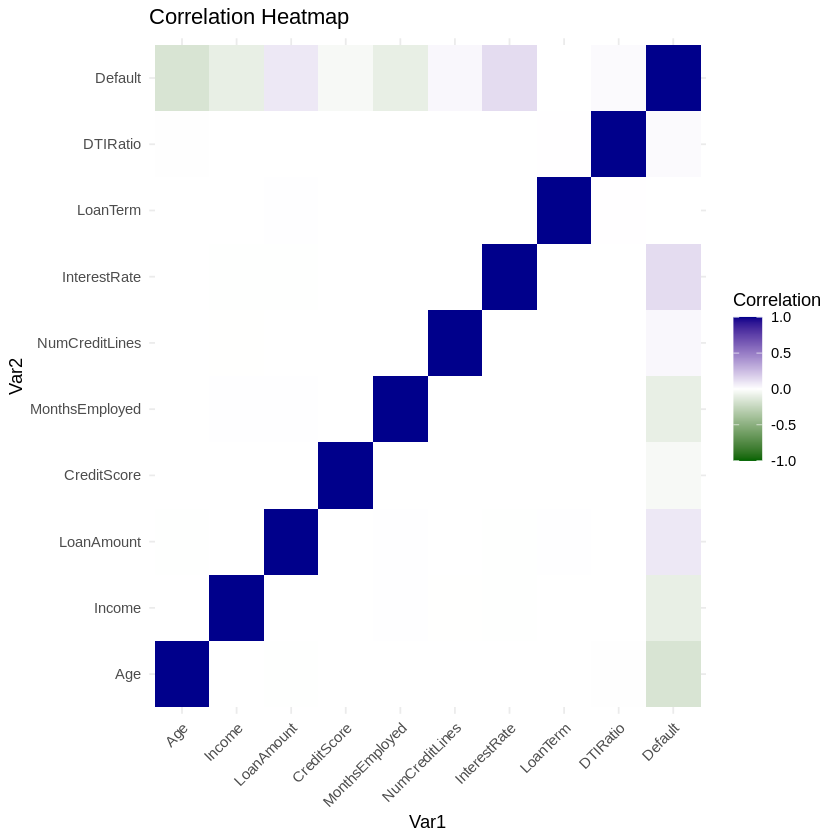

In [38]:
melted_cormat <- melt(correlation_matrix)
ggplot(data = melted_cormat, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "Dark green", high = "Dark Blue", midpoint = 0, limits = c(-1, 1)) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Correlation Heatmap", fill = "Correlation") +
  theme(legend.position = "right")

Plotting Box plots for each variable we find out that there are no outliers in our dataset which would affect our final prediction process

## Data Preprocessing

In [39]:
categorical_cols <- names(df)[sapply(df, is.character)]
categorical_cols

[1] "Education"      "EmploymentType" "MaritalStatus"  "HasMortgage"   
[5] "HasDependents"  "LoanPurpose"    "HasCoSigner"

In [40]:
binary_cat_cols = c('HasCoSigner', 'HasDependents', 'HasMortgage')
for (col in binary_cat_cols){
  df[[col]] <- ifelse(df[[col]] == "Yes", 1, 0)
}

head(df)


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<int>
1,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,1,1,Other,1,0
2,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,0,0,Other,1,0
3,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,1,1,Auto,0,1
4,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,0,0,Business,0,0
5,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,0,1,Auto,0,0
6,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,1,0,Business,1,1


In [41]:
# one hot encode cols havinf 4 categories:
one_hot_cols <- c('Education', 'EmploymentType', 'MaritalStatus','LoanPurpose')
formula <- as.formula(paste("~", paste(one_hot_cols, collapse = " + ")))
new_df <- dummyVars(formula, data = df)
new_df <- data.frame(predict(new_df, newdata = df))
str(new_df)
new_df <- cbind(new_df, df)
new_df <- new_df[, !(names(new_df) %in% one_hot_cols)]
str(new_df)


'data.frame':	255347 obs. of  16 variables:
 $ EducationBachelor.s        : num  1 0 0 0 1 0 1 0 1 0 ...
 $ EducationHigh.School       : num  0 0 0 1 0 1 0 0 0 1 ...
 $ EducationMaster.s          : num  0 1 1 0 0 0 0 0 0 0 ...
 $ EducationPhD               : num  0 0 0 0 0 0 0 1 0 0 ...
 $ EmploymentTypeFull.time    : num  1 1 0 1 0 0 0 1 0 0 ...
 $ EmploymentTypePart.time    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ EmploymentTypeSelf.employed: num  0 0 0 0 0 0 0 0 1 1 ...
 $ EmploymentTypeUnemployed   : num  0 0 1 0 1 1 1 0 0 0 ...
 $ MaritalStatusDivorced      : num  1 0 1 0 1 0 0 0 1 0 ...
 $ MaritalStatusMarried       : num  0 1 0 1 0 0 0 1 0 1 ...
 $ MaritalStatusSingle        : num  0 0 0 0 0 1 1 0 0 0 ...
 $ LoanPurposeAuto            : num  0 0 1 0 1 0 0 0 0 0 ...
 $ LoanPurposeBusiness        : num  0 0 0 1 0 1 0 0 0 0 ...
 $ LoanPurposeEducation       : num  0 0 0 0 0 0 0 0 1 0 ...
 $ LoanPurposeHome            : num  0 0 0 0 0 0 1 1 0 0 ...
 $ LoanPurposeOther           : num  1 1 

In [42]:
colnames(new_df)

[1] "EducationBachelor.s"         "EducationHigh.School"       
 [3] "EducationMaster.s"           "EducationPhD"               
 [5] "EmploymentTypeFull.time"     "EmploymentTypePart.time"    
 [7] "EmploymentTypeSelf.employed" "EmploymentTypeUnemployed"   
 [9] "MaritalStatusDivorced"       "MaritalStatusMarried"       
[11] "MaritalStatusSingle"         "LoanPurposeAuto"            
[13] "LoanPurposeBusiness"         "LoanPurposeEducation"       
[15] "LoanPurposeHome"             "LoanPurposeOther"           
[17] "Age"                         "Income"                     
[19] "LoanAmount"                  "CreditScore"                
[21] "MonthsEmployed"              "NumCreditLines"             
[23] "InterestRate"                "LoanTerm"                   
[25] "DTIRatio"                    "HasMortgage"                
[27] "HasDependents"               "HasCoSigner"                
[29] "Default"

In [43]:
value_counts <- table(new_df[["Default"]])
print(value_counts)


     0      1 
225694  29653 


In [72]:
#Oversampling data using ROSE
oversampled_df=ovun.sample(Default~.,data=new_df,method="over")
oversampled_df=oversampled_df$data
table(oversampled_df$Default)


     0      1 
225694 226171 

In [73]:
set.seed(123)  # Set a seed for reproducibility
train_indices <- createDataPartition(oversampled_df$Default, p = 0.8, list = FALSE)

train_data <- oversampled_df[train_indices,]
test_data <- oversampled_df[-train_indices, ]

test_data$Default = factor(test_data$Default,
                           levels = c(0, 1))

In [74]:
numerical_columns <- c('Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'InterestRate', 'DTIRatio')

# Feature Scaling
train_data[numerical_columns] = scale(train_data[numerical_columns])
test_data[numerical_columns] = scale(test_data[numerical_columns])


The numerical features of our dataset were standardised in order to  allow different systems to share and efficiently use data.

In [75]:
head(train_data)
head(test_data)

,EducationBachelor.s,EducationHigh.School,EducationMaster.s,EducationPhD,EmploymentTypeFull.time,EmploymentTypePart.time,EmploymentTypeSelf.employed,EmploymentTypeUnemployed,MaritalStatusDivorced,MaritalStatusMarried,⋯,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,HasMortgage,HasDependents,HasCoSigner,Default
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,0,0,0,1,0,0,0,1,0,⋯,-0.3003814,0.7078346,4,0.1034439,36,-0.2844461,1,1,1,0
3,0,1,0,0,1,0,0,0,0,1,⋯,1.1024347,-1.6016994,3,-1.1316932,24,-1.1957999,0,0,0,0
4,1,0,0,0,0,0,0,1,1,0,⋯,0.4104626,-1.3707460,4,-1.2164575,48,0.9740900,0,1,0,0
5,1,0,0,0,0,0,0,1,0,0,⋯,-0.8728311,0.7078346,1,0.6907395,12,-1.4995844,1,0,1,0
6,0,0,0,1,1,0,0,0,0,1,⋯,-0.2311842,0.3325353,4,-0.9682192,60,-0.3278439,0,0,1,0
8,0,1,0,0,0,0,0,1,0,1,⋯,0.5299851,1.1120030,2,-0.8274499,48,-1.1957999,0,0,0,0


,EducationBachelor.s,EducationHigh.School,EducationMaster.s,EducationPhD,EmploymentTypeFull.time,EmploymentTypePart.time,EmploymentTypeSelf.employed,EmploymentTypeUnemployed,MaritalStatusDivorced,MaritalStatusMarried,⋯,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,HasMortgage,HasDependents,HasCoSigner,Default
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2,0,0,1,0,1,0,0,0,0,1,⋯,-0.6947298,-1.1634709,1,-1.4698039,60,0.7542690,0,0,1,0
7,0,1,0,0,0,0,1,0,0,1,⋯,-0.5566119,1.6951653,4,-0.8229391,48,-0.7659591,1,0,1,0
11,0,0,1,0,0,1,0,0,1,0,⋯,0.4164919,1.6374151,4,-1.3458719,48,-1.3306152,0,0,0,0
12,0,0,1,0,0,0,0,1,0,1,⋯,-0.8579601,-0.7014691,2,-1.4410879,60,1.6664058,1,0,0,0
14,0,0,1,0,0,0,1,0,0,0,⋯,1.5214355,1.4641644,2,-0.1473584,60,0.6673988,1,0,0,0
19,1,0,0,0,0,0,0,1,0,0,⋯,-0.6319489,0.5112857,1,0.6899386,24,-1.2437451,0,0,0,0


## Logistic Regression

In [137]:
train_data$Default <- ifelse(train_data$Default == "Yes", 1, 0)
train_data$Default <- factor(train_data$Default, levels = c(0, 1))

In [140]:
logitmod <- glm(Default ~ ., family = binomial, data = train_data)
summary(logitmod)


Call:
glm(formula = Default ~ ., family = binomial, data = train_data)

Coefficients: (4 not defined because of singularities)
                               Estimate  Std. Error  z value
(Intercept)                  0.23070217  0.01847762   12.485
EducationBachelor.s          0.15501404  0.01046564   14.812
EducationHigh.School         0.24719406  0.01040937   23.747
EducationMaster.s            0.02871841  0.01062788    2.702
EducationPhD                         NA          NA       NA
EmploymentTypeFull.time     -0.42504980  0.01050484  -40.462
EmploymentTypePart.time     -0.16017499  0.01020075  -15.702
EmploymentTypeSelf.employed -0.19937095  0.01025515  -19.441
EmploymentTypeUnemployed             NA          NA       NA
MaritalStatusDivorced        0.06160519  0.00892527    6.902
MaritalStatusMarried        -0.16539224  0.00910461  -18.166
MaritalStatusSingle                  NA          NA       NA
LoanPurposeAuto              0.00263365  0.01161548    0.227
LoanPurposeBusines

In [141]:
pred <- predict(logitmod, newdata = test_data, type = "response")

In [177]:
# Load necessary libraries
library(pROC)
library(caret)

# Assuming you already have 'pred' as predicted probabilities and 'test_data' as the test dataset

# Define the actual binary labels (0 or 1) for your test dataset as factors
actual_labels <- as.factor(test_data$Default)

# Convert predicted probabilities to a binary factor
predicted_labels <- ifelse(pred > 0.5, 1, 0)
predicted_labels <- as.factor(predicted_labels)

# Create a confusion matrix
confusion_matrix <- table(Actual = actual_labels, Predicted = predicted_labels)

# Print the confusion matrix
print(confusion_matrix)



      Predicted
Actual     0     1
   No  30312 14731
   Yes 14060 31270


In [180]:
accuracy <- sum(diag(confusion_matrix)) / sum(confusion_matrix)
cat("Accuracy:", accuracy, "\n")

Accuracy: 0.6814203 


Setting levels: control = No, case = Yes

Setting direction: controls < cases



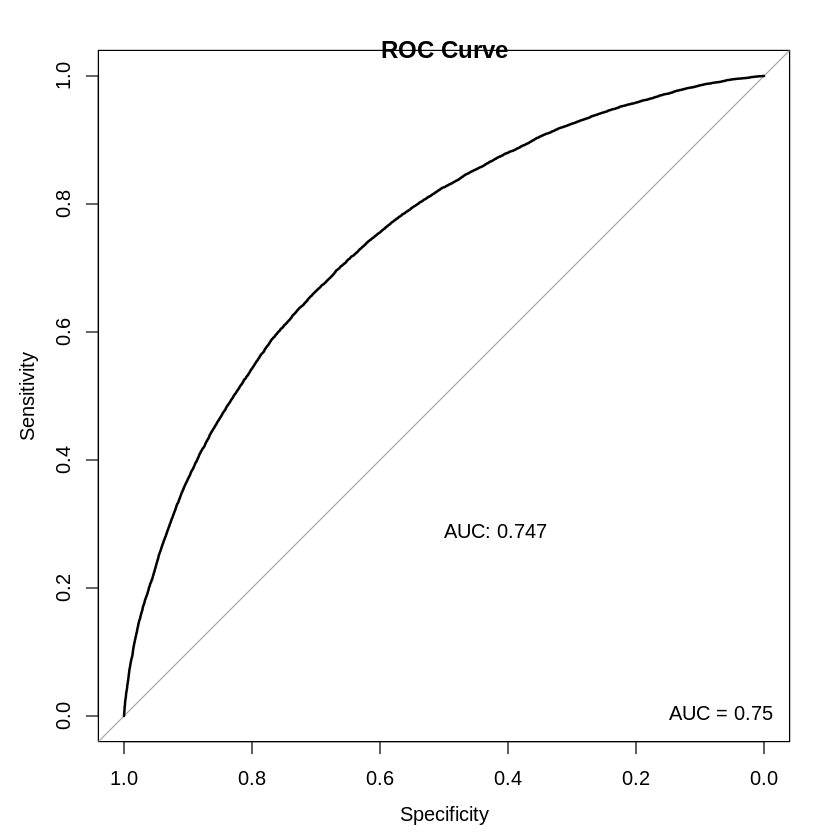

In [181]:
roc_curve <- roc(response = actual_labels, predictor = pred)

# Plot the ROC curve
plot(roc_curve, print.auc = TRUE, print.auc.y = 0.3)

# Add labels and a legend
legend("bottomright", legend = paste("AUC =", round(auc(roc_curve), 2)), bty = "n")
title("ROC Curve")

In [ ]:
#HyperParameter

In [183]:
install.packages("glmnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [206]:
library(glmnet)

In [207]:
set.seed(123)  # Set a random seed for reproducibility
trainIndex <- createDataPartition(train_data$Default, p = 0.7, list = FALSE)
train_set <- train_data[trainIndex, ]
validation_set <- train_data[-trainIndex, ]


In [208]:
lambda_seq <- 10^seq(-3, 3, by = 0.1)  # Example lambda values


In [209]:
cv_model <- cv.glmnet(x = as.matrix(train_set[, -1]), y = train_set$Default, alpha = 1, lambda = lambda_seq, family = "binomial", nfolds = 5)


In [210]:
best_lambda <- cv_model$lambda.min
cat("Best lambda:", best_lambda, "\n")


Best lambda: 0.001 


In [215]:
# Check and fix data types if necessary
str(train_data)
str(test_data)

# Ensure that both train_data and test_data have the same column names and data types

# Train the final logistic regression model using the best lambda on the entire training dataset
final_model <- glmnet(x = as.matrix(train_data), y = train_data$Default, alpha = 1, lambda = best_lambda, family = "binomial")

# Make predictions on the test dataset
test_data_matrix <- as.matrix(test_data)
test_predictions <- predict(final_model, s = best_lambda, newx = test_data_matrix, type = "response")

actual_labels <- as.factor(test_data$Default)

# Convert predicted probabilities to a binary factor
predicted_labels <- ifelse(test_predictions > 0.5, 1, 0)
predicted_labels <- as.factor(predicted_labels)

# Create a confusion matrix
confusion_matrix <- table(Actual = actual_labels, Predicted = predicted_labels)

# Print the confusion matrix
print(confusion_matrix)


'data.frame':	361492 obs. of  29 variables:
 $ EducationBachelor.s        : num  1 0 1 1 0 0 0 0 0 0 ...
 $ EducationHigh.School       : num  0 1 0 0 0 1 0 1 0 1 ...
 $ EducationMaster.s          : num  0 0 0 0 0 0 1 0 0 0 ...
 $ EducationPhD               : num  0 0 0 0 1 0 0 0 1 0 ...
 $ EmploymentTypeFull.time    : num  1 1 0 0 1 0 1 0 0 0 ...
 $ EmploymentTypePart.time    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ EmploymentTypeSelf.employed: num  0 0 0 0 0 0 0 0 0 1 ...
 $ EmploymentTypeUnemployed   : num  0 0 1 1 0 1 0 1 1 0 ...
 $ MaritalStatusDivorced      : num  1 0 1 0 0 0 1 0 0 0 ...
 $ MaritalStatusMarried       : num  0 1 0 0 1 1 0 0 0 0 ...
 $ MaritalStatusSingle        : num  0 0 0 1 0 0 0 1 1 1 ...
 $ LoanPurposeAuto            : num  0 0 1 0 0 0 1 1 0 0 ...
 $ LoanPurposeBusiness        : num  0 1 0 0 0 0 0 0 0 0 ...
 $ LoanPurposeEducation       : num  0 0 0 0 0 1 0 0 0 0 ...
 $ LoanPurposeHome            : num  0 0 0 1 1 0 0 0 1 0 ...
 $ LoanPurposeOther           : num  1 0 

In [216]:
# Check the first few rows of actual and predicted labels
head(actual_labels)
head(predicted_labels)


[1] <NA> <NA> <NA> <NA> <NA> <NA>
Levels: 0 1

[1] <NA> <NA> <NA> <NA> <NA> <NA>
Levels: